# Data Analysis and Credit Risk Modelling - **Loan Classification**

PROBLEM STATEMENT:

 Understand and apply machine learning techniques to classify loan applicants based on their likelihood of loan repayment.

## **import necessary libararies**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

## **Step 1: load the dataset**

In [2]:
data = pd.read_csv('/loan_detection.csv')

## **Step 2: Initial Inspection**

In [3]:
print("Data Head:")
print(data.head())

Data Head:
   age  campaign  pdays  previous  no_previous_contact  not_working  \
0   56         1    999         0                    1            0   
1   57         1    999         0                    1            0   
2   37         1    999         0                    1            0   
3   40         1    999         0                    1            0   
4   56         1    999         0                    1            0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0           0                0                 0              1  ...   
1           0                0                 0              0  ...   
2           0                0                 0              0  ...   
3           1                0                 0              0  ...   
4           0                0                 0              0  ...   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                

In [4]:
data.shape

(41188, 60)

In [5]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_

In [6]:
data.describe()


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**check for missing values**

In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
edu

## Conclusion:

* We can see that their are 60 different coloumns in the dataset.
* The datset has values of type int64 only.
* Their are no missing values in the dataset

## **Step 3: Explorartory Data Analysis**

**Outlier Detection using Boxplots, Z-Score and Quartiles**

In [8]:
numerical_features = data.select_dtypes(include=[np.number])
print("Numerical Features:")
print(numerical_features)

Numerical Features:
       age  campaign  pdays  previous  no_previous_contact  not_working  \
0       56         1    999         0                    1            0   
1       57         1    999         0                    1            0   
2       37         1    999         0                    1            0   
3       40         1    999         0                    1            0   
4       56         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
41183   73         1    999         0                    1            1   
41184   46         1    999         0                    1            0   
41185   56         2    999         0                    1            1   
41186   44         1    999         0                    1            0   
41187   74         3    999         1                    1            1   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0  

**Visualize the distribution of numerical features**

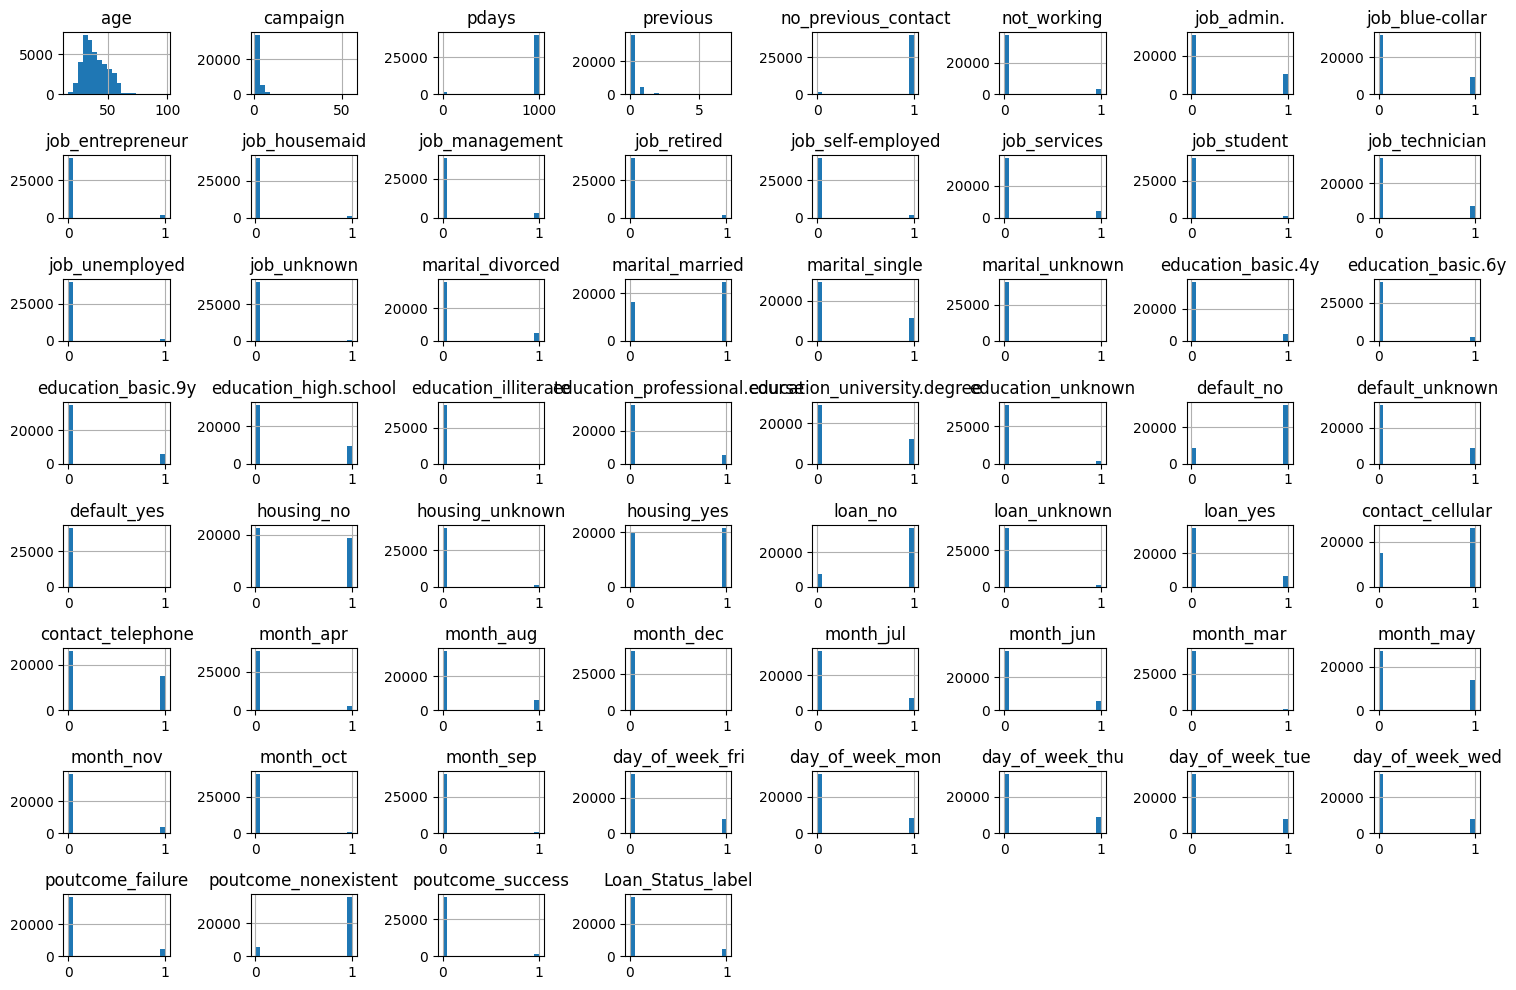

In [9]:
numerical_features.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

**Z-Score method to detect outliers**

In [10]:
z_scores = np.abs(zscore(numerical_features))
outliers = np.where(z_scores > 3)
print(f"Outliers detected at using zscore: \n{outliers}")

Outliers detected at using zscore: 
(array([    0,     1,     2, ..., 41187, 41187, 41187]), array([ 9, 13, 13, ...,  5, 11, 48]))


given solutuion tells us that these are the rows and coloumns where outliers were detected.


**Boxplots**


 Rows: 8, Columns: 8

 Boxplot of dataset


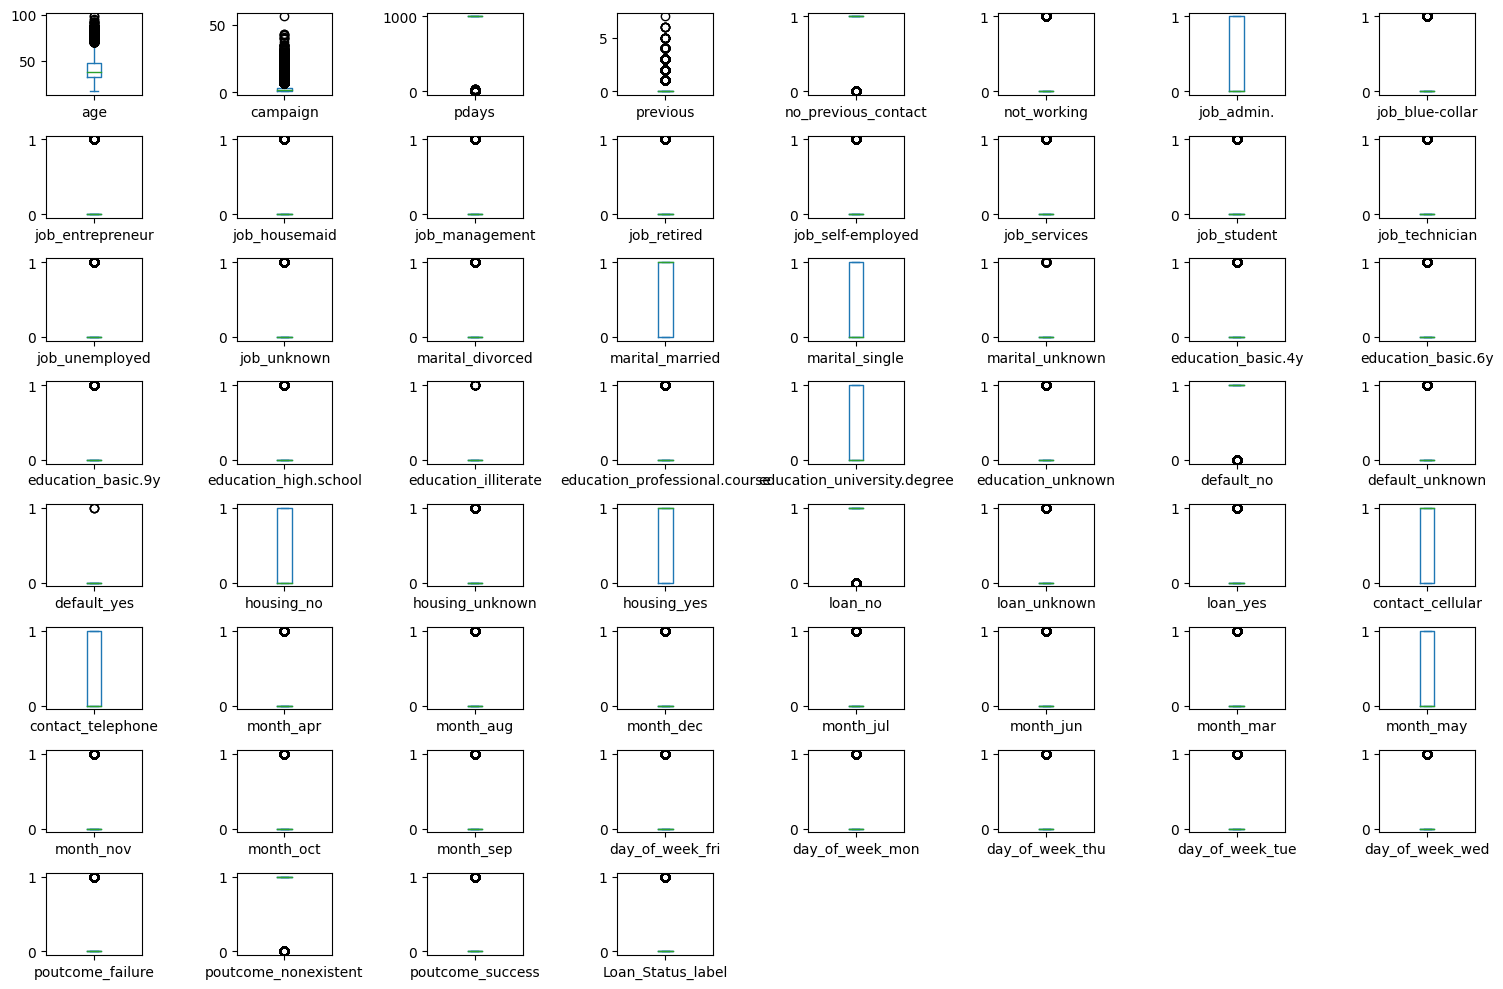

In [11]:
# Calculate the number of rows and columns needed to fit all features
num_features = numerical_features.shape[1]
nrows = int(np.ceil(np.sqrt(num_features)))  # Calculate rows for a roughly square layout
ncols = int(np.ceil(num_features / nrows))   # Calculate columns
print(f"\n Rows: {nrows}, Columns: {ncols}")
# Plot the boxplots
numerical_features.plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(15,10))
print("\n Boxplot of dataset")
plt.tight_layout()
plt.show()

**Interquartile Range (IQR) Method**

In [12]:
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))

# Print IQR outliers
print("\nOutliers detected using IQR method:")
for col in numerical_features.columns:
    outliers = numerical_features[outliers_iqr[col]]
    if not outliers.empty:
        print(f"\nOutliers in {col}:\n{outliers}")


Outliers detected using IQR method:

Outliers in age:
       age  campaign  pdays  previous  no_previous_contact  not_working  \
27713   70         3    999         0                    1            1   
27757   76         9    999         0                    1            1   
27780   73         1    999         1                    1            1   
27800   88         1    999         0                    1            1   
27802   88         2    999         0                    1            1   
...    ...       ...    ...       ...                  ...          ...   
40986   84         4      3         1                    0            1   
40996   81         1    999         2                    1            1   
41004   80         1    999         1                    1            1   
41183   73         1    999         0                    1            1   
41187   74         3    999         1                    1            1   

       job_admin.  job_blue-collar  job_entr

**Handling of outliers-capping of outliers**

In [13]:
# Define the capping thresholds (1st and 99th percentiles)
lower_cap = numerical_features.quantile(0.01)
upper_cap = numerical_features.quantile(0.99)

# Apply capping
data_capped = data.copy()  # Make a copy of the dataset to cap outliers

for col in numerical_features.columns:
    data_capped[col] = np.where(data_capped[col] < lower_cap[col], lower_cap[col], data_capped[col])
    data_capped[col] = np.where(data_capped[col] > upper_cap[col], upper_cap[col], data_capped[col])

# Show the number of capped values for each feature
capped_values_count = (data_capped != data).sum()
print("Number of capped values per feature:\n", capped_values_count)

# Check the distribution after capping
print("\nData after capping outliers:")
print(data_capped.describe())

Number of capped values per feature:
 age                              748
campaign                         406
pdays                            102
previous                         310
no_previous_contact                0
not_working                        0
job_admin.                         0
job_blue-collar                    0
job_entrepreneur                   0
job_housemaid                      0
job_management                     0
job_retired                        0
job_self-employed                  0
job_services                       0
job_student                        0
job_technician                     0
job_unemployed                     0
job_unknown                      330
marital_divorced                   0
marital_married                    0
marital_single                     0
marital_unknown                   80
education_basic.4y                 0
education_basic.6y                 0
education_basic.9y                 0
education_high.school              0


## **Step 4: Model Building**

**Encode Categorical Variables and Scale Numerical Features**

In [14]:
X = data.drop('Loan_Status_label', axis=1)
y = data['Loan_Status_label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

**Split the Data**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

**Model Selection**

In [16]:
logistic_model = LogisticRegression(random_state=42)

In [17]:
random_forest_model = RandomForestClassifier(random_state=42)

In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

**Model Training**

In [19]:
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Model Evaluation**

In [22]:
y_pred_logistic = logistic_model.predict(X_test)

In [23]:
y_pred_rf = random_forest_model.predict(X_test)

In [24]:
y_pred_xgb = xgb_model.predict(X_test)

In [25]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Performance:
Accuracy: 0.8981144290685441
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.66      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

Confusion Matrix:
 [[10829   139]
 [ 1120   269]]


In [26]:
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8887270373067897
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.51      0.25      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357

Confusion Matrix:
 [[10630   338]
 [ 1037   352]]


In [27]:
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.8943109168892126
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.57      0.24      0.33      1389

    accuracy                           0.89     12357
   macro avg       0.74      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357

Confusion Matrix:
 [[10724   244]
 [ 1062   327]]


## **Analysis**

**Based on Accuracy:**

* Logistic Regression has the highest accuracy at 0.90, slightly higher than XGBoost (0.89) and Random Forest (0.89).
* This suggests that Logistic Regression correctly predicts the overall outcome slightly more often.

**Based on Precision:**

* For Class 1 (the minority class), Logistic Regression has the highest precision at 0.66, followed by XGBoost at 0.57, and Random Forest at 0.51.
* This indicates that when Logistic Regression predicts a positive case (Class 1), it is more likely to be correct compared to the other models.

**Based on Recall:**

* Class 1 recall is highest with Random Forest and XGBoost at 0.25 and 0.24, respectively.
* Logistic Regression has a recall of only 0.19 for Class 1, meaning it misses more actual positives.
* Class 0 recall is highest with Logistic Regression at 0.99, meaning it correctly identifies almost all negatives.

**Based on F1-Score:**

* The F1-score for Class 1 is highest for Random Forest at 0.34, slightly better than XGBoost (0.33) and Logistic Regression (0.30).
* F1-Score balances precision and recall, making it a good metric when dealing with imbalanced classes.

**Based on Confusion Matrix:**

Class 1:

* Logistic Regression has the highest number of false negatives (1,120), meaning it misses many actual positives.
* XGBoost has a slightly lower number of false negatives (1,062) compared to Random Forest (1,037).

Class 0:

* Logistic Regression has the lowest number of false positives (139), indicating better performance in correctly identifying negatives.

From the above given results, ***Random Forest*** might be the best option for this problem, especially if *correctly identifying as many positives as possible* is crucial. However, if you need *higher precision and overall accuracy*, we can opt for ***Logistic Regression***.



### **Fine Tuning of model developed using XGBoost**

In [30]:
# Define the hyperparameter space
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': np.arange(100, 500, 50),   # Randomly select from 100 to 500 estimators
    'max_depth': np.arange(3, 10, 1),          # Randomly select from depths 3 to 10
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],    # Different subsample ratios
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Different feature subsample ratios
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],          # Range of gamma values for regularization
    'reg_alpha': [0, 0.01, 0.05, 0.1],         # L1 regularization
    'reg_lambda': [0.5, 1, 1.5, 2]             # L2 regularization
}

using RandomizedSerchCV because the dataset is large

In [33]:
# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1,
                                   verbose=2, random_state=42)

In [35]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                                        'reg_alpha': [0, 0.01, 0.05, 0.1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [37]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [38]:
# Train the XGBoost model with the best parameters
best_xgb_model = random_search.best_estimator_

In [39]:
# Predict on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [40]:
# Evaluate the tuned model
print("\nTuned XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))


Tuned XGBoost Performance:
Accuracy: 0.8990046127700898
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.67      0.20      0.31      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357

Confusion Matrix:
 [[10831   137]
 [ 1111   278]]


## Conlsuion:

1. Slight Improvement in Accuracy

2. Improved Precision, Decreased Recall

3. Trade-Off Between Precision and Recall

4. The reduction in false positives suggests the model is better at correctly classifying negatives, which could be valuable if the cost of a false positive is high.

## Comparison
1. Accuracy:
  
  Tuned XGBoost: 0.8990        
  
  Original XGBoost: 0.8943

2. Precision (Class 1):
  
  Tuned XGBoost: 0.67

  Original XGBoost: 0.57

3. Recall (Class 1):
  
  Tuned XGBoost: 0.20

  Original XGBoost: 0.24

4. F1-Score (Class 1):
   
   Tuned XGBoost: 0.31

  Original XGBoost: 0.33

5. Confusion Matrix:
  
  Tuned XGBoost:
    
  True Negatives (Class 0): 10,831
    
  False Positives (Class 0): 137

  False Negatives (Class 1): 1,111

  True Positives (Class 1): 278

  Original XGBoost:

  True Negatives (Class 0): 10,724

  False Positives (Class 0): 244
  
  False Negatives (Class 1): 1,062
  
  True Positives (Class 1): 327